In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro


### p131

In [2]:
df = pd.DataFrame({'sample': [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})

# 정규성 검정
shapiro(df)
# p > 0.05 이므로 귀무가설 채택
# 정규성이 있다

ShapiroResult(statistic=0.8473217487335205, pvalue=0.0539751797914505)

In [3]:
# 1-sample t-test
t_result = stats.ttest_1samp(df, 78.0)

## 1-sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3),t_result.pvalue.round(3)

## 1-sample t-test의 t값 p값 출력
print("1-Sample t-test")
print("통계량 : {}".format(t))
print("p-value : {}".format(p))

#가설 수립 및 유의수준 설정 - 귀무가설 : 평균이 78이다  대립가설 : 평균이 78이 아니다  유의수준 : 0.05
# 가설 검정 수행 - 통계량 3.379 / p-value : 0.008
# 검정 결과 판단 - p 값이 0.008 이므로 p < 0.05 이므로 대립가설을 채택, 평균이 78이 아니다.
# 즉, 개선활동이 고객 만족도 변화를 향상시켰다고 볼 수 있습니다. 

1-Sample t-test
통계량 : [3.379]
p-value : [0.008]


### p139

In [4]:
df1 = pd.DataFrame({'sample': [1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344]})
df2 = pd.DataFrame({'sample': [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]})

# 정규성 검정
shapiro(df1)  # 정규성이 있다  (p > 0.05, 귀무가설 채택)

ShapiroResult(statistic=0.8425756096839905, pvalue=0.08004552870988846)

In [5]:
# 정규성 검정
shapiro(df2)  # 정규성이 없다. (p < 0.05, 대립가설 채택))

ShapiroResult(statistic=0.7734811902046204, pvalue=0.014793740585446358)

In [7]:
# 등분산성 검정
stats.levene(df1['sample'],df2['sample'])
# p > 0.05 이므로 귀무가설 채택
# 즉, 등분산성이 있다.

LeveneResult(statistic=0.4408416728536036, pvalue=0.5175025061092301)

In [9]:
t_result = stats.ttest_ind(df1, df2)

t, p = t_result.statistic.round(3),t_result.pvalue.round(3)

## 2-sample t-test의 t값 p값 출력
print("2-Sample t-test")
print("t : {}".format(t))
print("p : {}".format(p))

# 가설 수립 및 유의수준 설정 - 귀무가설 : A 공급자와 B공급자의 평균차이가 없다 / 대립가설 : A 공급자와 B공급자의 평균차이가 있다
# 가설 검정 수행 -통계량 1.7 / p-value : 0.111  
# 검정결과 판단 - p > 0.05 이므로 귀무가설 채택, A 공급자와 B공급자의 평균차이가 없다
# 즉, 공급자간의 두께 차이가 없다.

2-Sample t-test
t : [1.7]
p : [0.111]


### p142

In [10]:
df1 = pd.DataFrame({'before': [720,589, 780, 648, 720, 589, 780, 648, 780, 648 ]})
df2 = pd.DataFrame({'after': [710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

t_result = stats.ttest_rel(df1, df2)

t, p = t_result.statistic.round(3),t_result.pvalue.round(3)

## paired t-test의 t값 p값 출력
print("Paired t-test")
print("t : {}".format(t))
print("p : {}".format(p))

# 가설 수립 및 유의수준 설정 - 귀무가설 : 평균의 차이가 없다. / 대립가설 : 평균의 차이가 있다.
# 가설 검정 수행 -통계량 -2.266 / p-value : 0.05 
# 검정결과 판단 - p = 0.05 이므로 대립가설 채택, 평균의 차이가 있다.
# 즉, 회사원들은 학원 숭강 전후의 점수는 차이가 있다고 할 수 있다.
# 통계량이 음수이기 떄문에 (before-after) 학원을 간 후가 점수가 더 좋아졌다고 할 수 있다.  

Paired t-test
t : [-2.266]
p : [0.05]


### p148

In [11]:
count = 40
n_obs = 100
value = 0.5  


stat,pval = proportions_ztest(count, n_obs, value)

print("1 Proportions test")
print("z : {0:0.3f}".format(stat))
print("p : {0:0.3f}".format(pval))


# 가설 수립 및 유의수준 설정 - 귀무가설 : 앞면이 나올 확률은 50%이다. / 대립가설 : 앞면이 나올 확률은 50%가 아니다.
# 가설 검정 수행 -통계량 -2.041 / p-value : 0.041
# 검정결과 판단 - p < 0.05 이므로 대립가설 채택, 앞면이 나올 확률은 50%가 아니다. 
# 즉, 이 동전은 정상이 아니다. 그리고 z가 양수값이기에 앞면이 나올 확률이 50%에 미치지 못한다고 할 수 있다. 

1 Proportions test
z : -2.041
p : 0.041


### p151

In [12]:
count = np.array([14, 5])
nobs = np.array([1200, 1200])

stat, pval = proportions_ztest(count, nobs)

print("2 Proportions test")
print("z : {0:0.3f}".format(stat))
print("p : {0:0.3f}".format(pval))


# 가설 수립 및 유의수준 설정 - 귀무가설 : 두 공장의 불량률은 차이가 없다. / 대립가설 : 두 공장의 불량률은 차이가 있다.
# 가설 검정 수행 -통계량 2.703 / p-value : 0.038
# 검정결과 판단 - p < 0.05 이므로 대립가설 채택, 두 공장의 불량률은 차이가 있다.
# 즉, 두 공정의 불량률이 같다고 할 수 없다. 통계량이 양수 값이므로 A공장의 불량률이 더 높다고 할 수 있다.

2 Proportions test
z : 2.073
p : 0.038


### p167

강종별 2차정련 시간에 차이가 있는지 검정

one-way
F 통계량 : 4.172
p-value : 0.019


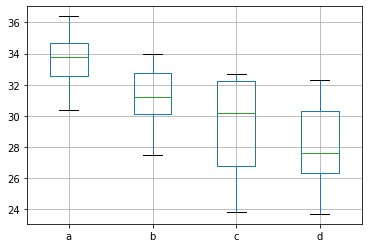

In [13]:
df = pd.DataFrame({'a': [32.2, 30.4, 33.6, 36.4, 33.9, 34.9],
                   'b': [33.1, 29.9, 31.7,27.5, 34, 30.7 ],
                   'c' : [32.6, 32.7, 29.3, 25.9, 31.1, 23.8],
                   'd' : [26.7, 28.5, 30.9, 26.2, 32.3, 23.7]})

df.boxplot(['a', 'b', 'c', 'd'])
f_result = stats.f_oneway(df['a'],df['b'],df['c'],df['d'])

f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("one-way")
print('F 통계량 : {}'.format(f))
print('p-value : {}'.format(p))

# 가설 수립 및 유의수준 설정 - 귀무가설 : 그룹 간의 평균이 똑같다. / 대립가설 : 적어도 하나의 평균이 다른 것이 존재한다.
# 가설 검정 수행 -통계량 4.172 / p-value : 0.019
# 검정결과 판단 - p < 0.05 이므로 대립가설 채택, 적어도 하나의 평균이 다른 것이 존재한다.
# 즉, 강종별로 2차정련 시간에 차이가 있다.

type에 따라 2차정련 시간에 차이가 있는지 검정

one-way
F 통계량 : 9.654
p-value : 0.005


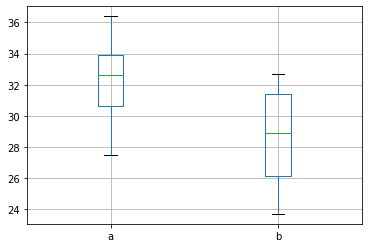

In [14]:
df = pd.DataFrame({'a': [32.2, 30.4, 33.6, 36.4, 33.9, 34.9,33.1, 29.9, 31.7,27.5, 34, 30.7],
                   'b' : [32.6, 32.7, 29.3, 25.9, 31.1, 23.8,26.7, 28.5, 30.9, 26.2, 32.3, 23.7]})

df.boxplot(['a', 'b'])
f_result = stats.f_oneway(df['a'],df['b'])

f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("one-way")
print('F 통계량 : {}'.format(f))
print('p-value : {}'.format(p))

# 가설 수립 및 유의수준 설정 - 귀무가설 : 그룹 간의 평균이 똑같다. / 대립가설 : 적어도 하나의 평균이 다른 것이 존재한다.
# 가설 검정 수행 -통계량 9.654 / p-value : 0.005
# 검정결과 판단 - p < 0.05 이므로 대립가설 채택, 적어도 하나의 평균이 다른 것이 존재한다.
# 즉, type 별로 2차정련 시간에 차이가 있다.

### p204

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
import matplotlib


matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus=False)


1. 데이터 구성하기 

In [66]:
# 데이터 구성하기

df_raw = pd.DataFrame({'Strength':[37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5],
                       'Baking_time':[0.798922, 0.84902, 0.816163, 0.758266, 0.815894, 0.807477, 0.809068, 0.7664, 0.742243, 0.751118, 0.740629, 0.751495, 0.738863, 0.827428, 0.818172, 0.740939, 0.757128, 0.804695, 0.695121, 0.735377]})

In [67]:
df_raw.describe().round(3)

,Strength,Baking_time
count,20.000,20.000
mean,36.965,0.776
std,1.565,0.041
min,33.000,0.695
25%,36.375,0.742
50%,37.150,0.762
75%,37.725,0.811
max,39.000,0.849


2. 경향성 확인 

<AxesSubplot:xlabel='Strength', ylabel='Baking_time'>

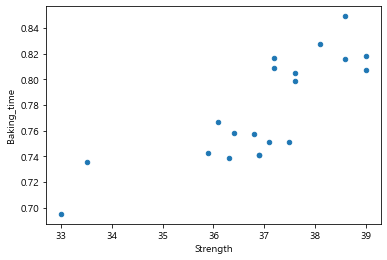

In [68]:
# 산점도 분석  (선형적 관계이다 Strength가 증가 함에 따라 Baking time도 증가한다.)
df_raw.plot.scatter(x = 'Strength', y = 'Baking_time')

In [69]:
# 상관관계 분석
df_raw.corr(method = 'pearson').round(3)

# 상관관계가 0.804 이므로 양의 상관관계이며 선형관계가 있음을 확인할 수 있다 

,Strength,Baking_time
Strength,1.000,0.804
Baking_time,0.804,1.000


3. 회귀 모델 생성

In [70]:
# 선형회귀분석

reg_model = smf.ols(formula = 'Baking_time ~ Strength', data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

# R-squared 가 0.646 이다 Strength 로 Baking_time의 변동이 64.6%을 설명할 수 있다. 
# p 값이 1.95e-05 이므로 유의수준 0.05 보다 작으므로 회귀모델로서 유의하다 = 기울기가 의미가 있다.
# No. Observations (분석자료수) : 20개 / Df Residual(잔차 자유도) : 18 / Df Model(모델 자유도) : 1
# Strength 의 p값이 0.000 이다. p < 0.05 이므로 유의하다 

                            OLS Regression Results                            
Dep. Variable:            Baking_time   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.90
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           1.95e-05
Time:                        21:39:24   Log-Likelihood:                 46.530
No. Observations:                  20   AIC:                            -89.06
Df Residuals:                      18   BIC:                            -87.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0023      0.135      0.017      0.9

4. 잔차(오차) 분석

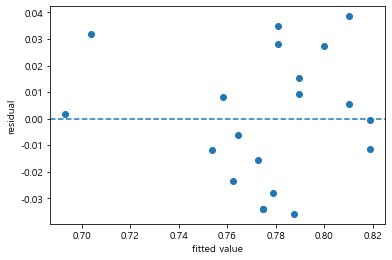

In [71]:
# 잔차의 등분산성 
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.axhline(y = 0, linestyle = '--')

# 그래프를 보면 경향성이 없으며 등분산성을 만족한다. 

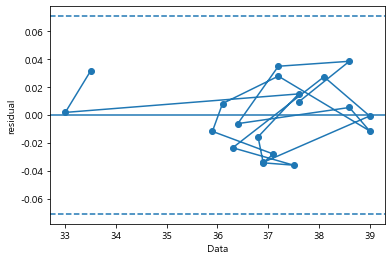

In [72]:
# 잔차의 독립성
plt.plot(df_raw['Strength'], reg_result.resid, marker = 'o')
plt.xlabel('Data')
plt.ylabel('residual')
plt.axhline(y = 0, linestyle = '-')
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = '--')
plt.axhline(y = -3* np.std(reg_result.resid), linestyle = '--')

# 독립성을 만족한다. 

NormaltestResult(statistic=2.6513017707721476, pvalue=0.26563000811901577)

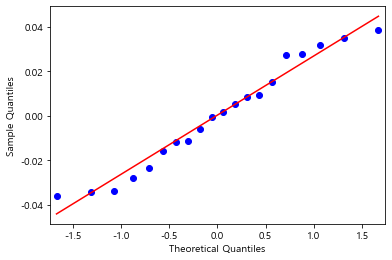

In [75]:
# 잔차의 정규성 검정
qqplot(reg_result.resid, line = 'q')

from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis =0)

# 정규 분포 직선을 중심으로 분포하고 있다. 
# p = 0.26 이므로 p > 0.05 귀무가설을 채택한다
# 즉, 정규분포를 따른다. 

In [76]:
# 더빈왓슨 통계량 - 잔차간의 독립성을 확인하는 통계량
from statsmodels.stats.stattools import durbin_watson

durbin_watson(reg_result.resid)

# 2에 가까운 값으로 잔차가 독립한다. 잔차간의 상관계수가 없다.

1.1281763812390104

5. 모델 분석

y^ = 0.0023 + 0.0209 * Strength

-> 강도가 증가할때마다 베이킹 시간이 0.0209씩 증가한다.

초코칩의 강도가 40 일때 예상 베이킹 시간은 0.8383 이다.